In [8]:
from sklearn.datasets import fetch_20newsgroups
from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

#To fetch 20newsgroups training dataset
twenty_train = fetch_20newsgroups(subset='train', shuffle=True)

#To get the data labels and save them in y
y = twenty_train.target

# To assign the text data into sentences variable
sentences = twenty_train.data

#To Tokenize the sentences into words we set up the number of words to be 2000
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(sentences)
# To represent the sentences as a numerical data we grt the text matrix of the sentences  
sentences = tokenizer.texts_to_matrix(sentences)

#To encode and process our data labels
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)


In [9]:
# To split our dataset into testing and training
X_train, X_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1000)

In [10]:
# First we create layers of size 2000 for input layer and 128 for the hidden layer and 20 for the output we set the epochs to 50
model = Sequential()
model.add(layers.Dense(128,input_dim=2000, activation='relu'))
model.add(layers.Dense(20, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])
history1=model.fit(X_train,y_train, epochs=10, verbose=True, validation_data=(X_test,y_test), batch_size=256)


Train on 8485 samples, validate on 2829 samples
Epoch 1/10
8485/8485 [==============================] - 0s 30us/step - loss: 2.4608 - acc: 0.3776 - val_loss: 1.7671 - val_acc: 0.6614
Epoch 2/10
8485/8485 [==============================] - 0s 22us/step - loss: 1.2594 - acc: 0.7811 - val_loss: 1.0968 - val_acc: 0.7681
Epoch 3/10
8485/8485 [==============================] - 0s 22us/step - loss: 0.7666 - acc: 0.8616 - val_loss: 0.8422 - val_acc: 0.8052
Epoch 4/10
8485/8485 [==============================] - 0s 22us/step - loss: 0.5456 - acc: 0.8996 - val_loss: 0.7277 - val_acc: 0.8180
Epoch 5/10
8485/8485 [==============================] - 0s 22us/step - loss: 0.4178 - acc: 0.9225 - val_loss: 0.6552 - val_acc: 0.8293
Epoch 6/10
8485/8485 [==============================] - 0s 22us/step - loss: 0.3269 - acc: 0.9435 - val_loss: 0.6188 - val_acc: 0.8303
Epoch 7/10
8485/8485 [==============================] - 0s 22us/step - loss: 0.2634 - acc: 0.9597 - val_loss: 0.5918 - val_acc: 0.8342
Epoch 8

In [11]:
# To get the Evaluation result on Test Data
[test_loss, test_acc] = model.evaluate(X_test,y_test)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

2829/2829 [==============================] - 0s 46us/step
Evaluation result on Test Data : Loss = 0.562834203432878, accuracy = 0.8320961594581604


In [17]:
predict_classe = model.predict_classes(X_test[[1000],:])
print(predict_classe[0])
print(y_test[1000])

19
19


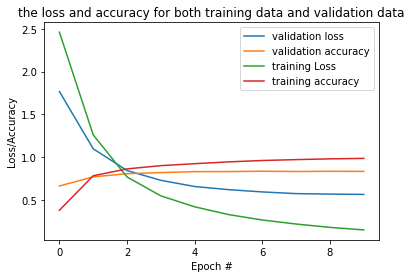

In [13]:

import matplotlib.pyplot as plt
import numpy as np


#To plot the loss and accuracy for both training data and validation data. 
plt.figure()
plt.plot(np.arange(0, 10), history1.history["val_loss"], label="validation loss")
plt.plot(np.arange(0, 10), history1.history["val_acc"], label="validation accuracy")
plt.plot(np.arange(0, 10), history1.history["loss"], label="training Loss")
plt.plot(np.arange(0, 10), history1.history["acc"], label="training accuracy")
plt.title("the loss and accuracy for both training data and validation data")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="best")

In [14]:
#We add embedding layer with flatten to check if the accuracy improved
from keras.layers import Embedding, Flatten
model2 = Sequential()
model2.add(Embedding(2000, 50, input_length=2000))
model2.add(Flatten())
model2.add(layers.Dense(128,input_dim=2000, activation='relu'))
model2.add(layers.Dense(20,activation='softmax'))

model2.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])

history2=model2.fit(X_train,y_train, epochs=10, verbose=True, validation_data=(X_test,y_test), batch_size=256)

[test_loss, test_acc] = model2.evaluate(X_test, y_test)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 8485 samples, validate on 2829 samples
Epoch 1/10
8485/8485 [==============================] - 1s 160us/step - loss: 3.1389 - acc: 0.0805 - val_loss: 2.8821 - val_acc: 0.1138
Epoch 2/10
8485/8485 [==============================] - 1s 146us/step - loss: 2.7129 - acc: 0.2001 - val_loss: 2.5138 - val_acc: 0.2096
Epoch 3/10
8485/8485 [==============================] - 1s 146us/step - loss: 2.0420 - acc: 0.4858 - val_loss: 1.6977 - val_acc: 0.5864
Epoch 4/10
8485/8485 [==============================] - 1s 146us/step - loss: 1.1929 - acc: 0.7060 - val_loss: 1.0574 - val_acc: 0.7225
Epoch 5/10
8485/8485 [==============================] - 1s 146us/step - loss: 0.7111 - acc: 0.8160 - val_loss: 0.8803 - val_acc: 0.7565
Epoch 6/10
8485/8485 [==============================] - 1s 146us/step - loss: 0.4993 - acc: 0.8722 - val_loss: 0.8294 - val_acc: 0.7515
Epoch 7/10
8485/8485 [==============================] - 1s 146us/step - loss: 0.3752 - acc: 0.9057 - val_loss: 0.7477 - val_acc: 0.7798


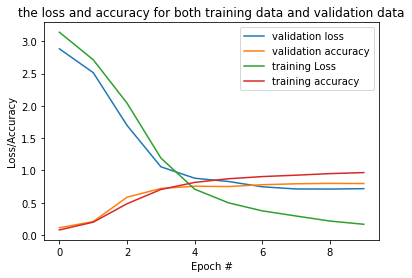

In [15]:
#To plot the loss and accuracy for both training data and validation data. 
plt.figure()
plt.plot(np.arange(0, 10), history2.history["val_loss"], label="validation loss")
plt.plot(np.arange(0, 10), history2.history["val_acc"], label="validation accuracy")
plt.plot(np.arange(0, 10), history2.history["loss"], label="training Loss")
plt.plot(np.arange(0, 10), history2.history["acc"], label="training accuracy")
plt.title("the loss and accuracy for both training data and validation data")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="best")

In [16]:
predict_classe2 = model2.predict_classes(X_test[[1000],:])
print(predict_classe2[0])
print(y_test[1000])

19
19
